<a href="https://colab.research.google.com/github/Ashwal-B-S/PlantDiseaseDetection/blob/main/SubClassifier_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Getting Dataset

In [1]:
!git clone https://github.com/deepakHonakeri05/yolo_dataset.git

Cloning into 'yolo_dataset'...
remote: Enumerating objects: 36553, done.
remote: Total 36553 (delta 0), reused 0 (delta 0), pack-reused 36553
Receiving objects: 100% (36553/36553), 632.83 MiB | 19.42 MiB/s, done.
Resolving deltas: 100% (221/221), done.
Checking out files: 100% (72348/72348), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential,load_model,Model
from tensorflow.python.keras.layers import Dense

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

import cv2

import os

import numpy as np
from keras.preprocessing import image

In [4]:
# PEACHES

NUM_CLASSES = 2

RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']


model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = 'imagenet'))


# model.add(Dense(1024, activation = DENSE_LAYER_ACTIVATION))
# 2nd layer as Dense for 2-class classification
model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False

#compiling
model.compile(optimizer = 'adam', loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)

# model.load_weights('./peach.h5')


94773248/94765736 [==============================] - 1s 0us/step


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range = 270,
    brightness_range = (-2,2),
        shear_range=0.2,
        zoom_range=0.3,
    vertical_flip=True,
    validation_split=0.3,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(vertical_flip=True,
                                 horizontal_flip=True,
                                 rotation_range=180,
                                 zoom_range=0.2)

val_datagen = ImageDataGenerator(vertical_flip=True,
                                 horizontal_flip=True,
                                 rotation_range=180,
                                 zoom_range=0.2)

train_set = train_datagen.flow_from_directory(
        'yolo_dataset/Peach/train/',
        target_size=(224,224),
        batch_size=64,
        seed=101, 
        shuffle=True,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'yolo_dataset/Peach/test/',
        target_size=(224, 224),
        batch_size=64,
        shuffle=True,
        seed=101,
        class_mode='categorical')

# val_set = val_datagen.flow_from_directory(
#         'yolo_dataset/pepper/val/',
#         target_size=(224, 224),
#         batch_size=64,
#         shuffle=True,
#         seed=101,
#         class_mode='categorical')

history = model.fit_generator(
        train_set,
        epochs=20,
        validation_data=test_set,
        validation_steps=9)

model.save_weights("/content/drive/My Drive/Leaf_Weights/Weights/peachweights.h5")

Found 2126 images belonging to 2 classes.
Found 531 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
34/34 [==============================] - 52s 1s/step - loss: 0.4073 - accuracy: 0.8650 - val_loss: 0.1305 - val_accuracy: 0.9642
Epoch 2/20
34/34 [==============================] - 33s 972ms/step - loss: 0.2558 - accuracy: 0.9177 - val_loss: 0.0802 - val_accuracy: 0.9755
Epoch 3/20
34/34 [==============================] - 34s 996ms/step - loss: 0.2510 - accuracy: 0.9163 - val_loss: 0.0617 - val_accuracy: 0.9849
Epoch 4/20
34/34 [==============================] - 33s 975ms/step - loss: 0.2422 - accuracy: 0.9205 - val_loss: 0.0477 - val_accuracy: 0.9868
Epoch 5/20
34/34 [==============================] - 34s 998ms/step - loss: 0.2365 - accuracy: 0.9186 - val_loss: 0.0462 - val_accuracy: 0.9906
Epoch 6/20
34/34 [==============================] - 33s 972ms/step - loss: 0.2372 - accuracy: 0.9196 - val_loss: 0.0478 - val_accuracy: 0.9831
Epoch 7/20
34/34 [==============================] - 34s 989ms/step - loss: 0.2326 - accuracy: 0.9200 - val_loss: 0.0443 - val_accuracy: 0.9868
Ep

Rebuilding the network

In [7]:
# GRAPE

NUM_CLASSES = 4

RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']


model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = 'imagenet'))

#model.add(Dense(512, activation = DENSE_LAYER_ACTIVATION))

# 2nd layer as Dense for 4-class classification
model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False

#compiling
model.compile(optimizer = 'adam', loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)



In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 8196      
Total params: 23,595,908
Trainable params: 8,196
Non-trainable params: 23,587,712
_________________________________________________________________


In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range = 270,
    brightness_range = (-2,2),
        shear_range=0.2,
        zoom_range=0.3,
    vertical_flip=True,
    validation_split=0.3,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(vertical_flip=True,
                                 horizontal_flip=True,
                                 rotation_range=180,
                                 zoom_range=0.2)

val_datagen = ImageDataGenerator(vertical_flip=True,
                                 horizontal_flip=True,
                                 rotation_range=180,
                                 zoom_range=0.2)

train_set = train_datagen.flow_from_directory(
        'yolo_dataset/Grape/train/',
        target_size=(224,224),
        batch_size=64,
        seed=101, 
        shuffle=True,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'yolo_dataset/Grape/test/',
        target_size=(224, 224),
        batch_size=64,
        shuffle=True,
        seed=101,
        class_mode='categorical')

# val_set = val_datagen.flow_from_directory(
#         'yolo_dataset/pepper/val/',
#         target_size=(224, 224),
#         batch_size=64,
#         shuffle=True,
#         seed=101,
#         class_mode='categorical')

history = model.fit_generator(
        train_set,
        epochs=25,
        validation_data=test_set,
        validation_steps=13)


model.save_weights("/content/drive/My Drive/Leaf_Weights/Weights/grapeweights.h5")

Found 3251 images belonging to 4 classes.
Found 811 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
51/51 [==============================] - 56s 1s/step - loss: 1.1493 - accuracy: 0.4740 - val_loss: 0.3941 - val_accuracy: 0.8779
Epoch 2/25
51/51 [==============================] - 52s 1s/step - loss: 0.8836 - accuracy: 0.5798 - val_loss: 0.2583 - val_accuracy: 0.9248
Epoch 3/25
51/51 [==============================] - 52s 1s/step - loss: 0.8372 - accuracy: 0.6020 - val_loss: 0.1958 - val_accuracy: 0.9433
Epoch 4/25
51/51 [==============================] - 52s 1s/step - loss: 0.8309 - accuracy: 0.5915 - val_loss: 0.1708 - val_accuracy: 0.9445
Epoch 5/25
51/51 [==============================] - 52s 1s/step - loss: 0.7963 - accuracy: 0.6173 - val_loss: 0.1566 - val_accuracy: 0.9544
Epoch 6/25
51/51 [==============================] - 52s 1s/step - loss: 0.7849 - accuracy: 0.6189 - val_loss: 0.1493 - val_accuracy: 0.9433
Epoch 7/25
51/51 [==============================] - 52s 1s/step - loss: 0.7541 - accuracy: 0.6373 - val_loss: 0.1339 - val_accuracy: 0.9482
Epoch 8/25
51/51 [==

In [10]:
# APPLE

NUM_CLASSES = 4

RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']


model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = 'imagenet'))

#model.add(Dense(512, activation = DENSE_LAYER_ACTIVATION))

# 2nd layer as Dense for 4-class classification
model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False

#compiling
model.compile(optimizer = 'adam', loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)


# model.load_weights('./apple.h5')


In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 8196      
Total params: 23,595,908
Trainable params: 8,196
Non-trainable params: 23,587,712
_________________________________________________________________


In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range = 270,
    brightness_range = (-2,2),
        shear_range=0.2,
        zoom_range=0.3,
    vertical_flip=True,
    validation_split=0.3,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(vertical_flip=True,
                                 horizontal_flip=True,
                                 rotation_range=180,
                                 zoom_range=0.2)

val_datagen = ImageDataGenerator(vertical_flip=True,
                                 horizontal_flip=True,
                                 rotation_range=180,
                                 zoom_range=0.2)

train_set = train_datagen.flow_from_directory(
        'yolo_dataset/Apple/train/',
        target_size=(224,224),
        batch_size=64,
        seed=101, 
        shuffle=True,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'yolo_dataset/Apple/test/',
        target_size=(224, 224),
        batch_size=64,
        shuffle=True,
        seed=101,
        class_mode='categorical')

# val_set = val_datagen.flow_from_directory(
#         'yolo_dataset/pepper/val/',
#         target_size=(224, 224),
#         batch_size=64,
#         shuffle=True,
#         seed=101,
#         class_mode='categorical')

history = model.fit_generator(
        train_set,
        epochs=25,
        validation_data=test_set,
        validation_steps=10)


model.save_weights("/content/drive/My Drive/Leaf_Weights/Weights/appleweights.h5")

Found 2537 images belonging to 4 classes.
Found 634 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
40/40 [==============================] - 46s 1s/step - loss: 0.9860 - accuracy: 0.6165 - val_loss: 0.4184 - val_accuracy: 0.8707
Epoch 2/25
40/40 [==============================] - 40s 1s/step - loss: 0.7941 - accuracy: 0.7024 - val_loss: 0.2367 - val_accuracy: 0.9464
Epoch 3/25
40/40 [==============================] - 42s 1s/step - loss: 0.7667 - accuracy: 0.7123 - val_loss: 0.2016 - val_accuracy: 0.9511
Epoch 4/25
40/40 [==============================] - 40s 992ms/step - loss: 0.7526 - accuracy: 0.7130 - val_loss: 0.1680 - val_accuracy: 0.9653
Epoch 5/25
40/40 [==============================] - 41s 1s/step - loss: 0.7511 - accuracy: 0.7028 - val_loss: 0.1499 - val_accuracy: 0.9637
Epoch 6/25
40/40 [==============================] - 40s 995ms/step - loss: 0.7371 - accuracy: 0.7103 - val_loss: 0.1199 - val_accuracy: 0.9621
Epoch 7/25
40/40 [==============================] - 40s 1s/step - loss: 0.7340 - accuracy: 0.7154 - val_loss: 0.1353 - val_accuracy: 0.9621
Epoch 8/25
40/

Rebuilding the network

In [13]:
# CHERRY

NUM_CLASSES = 2

RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']


model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = 'imagenet'))

#model.add(Dense(512, activation = DENSE_LAYER_ACTIVATION))

# 2nd layer as Dense for 2-class classification
model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False

#compiling
model.compile(optimizer = 'adam', loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)


# model.load_weights('./apple.h5')


In [14]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [15]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range = 270,
    brightness_range = (-2,2),
        shear_range=0.2,
        zoom_range=0.3,
    vertical_flip=True,
    validation_split=0.3,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(vertical_flip=True,
                                 horizontal_flip=True,
                                 rotation_range=180,
                                 zoom_range=0.2)

val_datagen = ImageDataGenerator(vertical_flip=True,
                                 horizontal_flip=True,
                                 rotation_range=180,
                                 zoom_range=0.2)

train_set = train_datagen.flow_from_directory(
        'yolo_dataset/cherry/train/',
        target_size=(224,224),
        batch_size=64,
        seed=101, 
        shuffle=True,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'yolo_dataset/cherry/test/',
        target_size=(224, 224),
        batch_size=64,
        shuffle=True,
        seed=101,
        class_mode='categorical')

# val_set = val_datagen.flow_from_directory(
#         'yolo_dataset/pepper/val/',
#         target_size=(224, 224),
#         batch_size=64,
#         shuffle=True,
#         seed=101,
#         class_mode='categorical')

history = model.fit_generator(
        train_set,
        epochs=20,
        validation_data=test_set,
        validation_steps=6)


model.save_weights("/content/drive/My Drive/Leaf_Weights/Weights/cherryweights.h5")

Found 1374 images belonging to 2 classes.
Found 380 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
22/22 [==============================] - 27s 1s/step - loss: 0.5508 - accuracy: 0.6776 - val_loss: 0.1038 - val_accuracy: 0.9789
Epoch 2/20
22/22 [==============================] - 22s 1s/step - loss: 0.3867 - accuracy: 0.7656 - val_loss: 0.0488 - val_accuracy: 0.9895
Epoch 3/20
22/22 [==============================] - 24s 1s/step - loss: 0.3787 - accuracy: 0.7533 - val_loss: 0.0309 - val_accuracy: 0.9974
Epoch 4/20
22/22 [==============================] - 22s 1s/step - loss: 0.3719 - accuracy: 0.7809 - val_loss: 0.0243 - val_accuracy: 0.9974
Epoch 5/20
22/22 [==============================] - 22s 996ms/step - loss: 0.3781 - accuracy: 0.7627 - val_loss: 0.0186 - val_accuracy: 0.9974
Epoch 6/20
22/22 [==============================] - 23s 1s/step - loss: 0.3657 - accuracy: 0.7635 - val_loss: 0.0164 - val_accuracy: 0.9974
Epoch 7/20
22/22 [==============================] - 22s 995ms/step - loss: 0.3691 - accuracy: 0.7686 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 8/20
22/

Rebuilding the network

In [16]:
# PEPPER

NUM_CLASSES = 2

RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']


model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = 'imagenet'))

#model.add(Dense(512, activation = DENSE_LAYER_ACTIVATION))

# 2nd layer as Dense for 2-class classification
model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False

#compiling
model.compile(optimizer = 'adam', loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)


In [17]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [18]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range = 270,
    brightness_range = (-2,2),
        shear_range=0.2,
        zoom_range=0.3,
    vertical_flip=True,
    validation_split=0.3,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(vertical_flip=True,
                                 horizontal_flip=True,
                                 rotation_range=180,
                                 zoom_range=0.2)

val_datagen = ImageDataGenerator(vertical_flip=True,
                                 horizontal_flip=True,
                                 rotation_range=180,
                                 zoom_range=0.2)

train_set = train_datagen.flow_from_directory(
        'yolo_dataset/pepper/train/',
        target_size=(224,224),
        batch_size=64,
        seed=101, 
        shuffle=True,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'yolo_dataset/pepper/test/',
        target_size=(224, 224),
        batch_size=64,
        shuffle=True,
        seed=101,
        class_mode='categorical')

# val_set = val_datagen.flow_from_directory(
#         'yolo_dataset/pepper/val/',
#         target_size=(224, 224),
#         batch_size=64,
#         shuffle=True,
#         seed=101,
#         class_mode='categorical')

history = model.fit_generator(
        train_set,
        epochs=20,
        validation_data=test_set,
        validation_steps=8)


model.save_weights("/content/drive/My Drive/Leaf_Weights/Weights/pepperweights.h5")

Found 1784 images belonging to 2 classes.
Found 494 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
28/28 [==============================] - 33s 1s/step - loss: 0.5919 - accuracy: 0.6592 - val_loss: 0.2647 - val_accuracy: 0.9089
Epoch 2/20
28/28 [==============================] - 29s 1s/step - loss: 0.4567 - accuracy: 0.7506 - val_loss: 0.1817 - val_accuracy: 0.9474
Epoch 3/20
28/28 [==============================] - 29s 1s/step - loss: 0.4482 - accuracy: 0.7646 - val_loss: 0.1785 - val_accuracy: 0.9534
Epoch 4/20
28/28 [==============================] - 29s 1s/step - loss: 0.4458 - accuracy: 0.7522 - val_loss: 0.1289 - val_accuracy: 0.9676
Epoch 5/20
28/28 [==============================] - 30s 1s/step - loss: 0.4438 - accuracy: 0.7422 - val_loss: 0.1292 - val_accuracy: 0.9737
Epoch 6/20
28/28 [==============================] - 29s 1s/step - loss: 0.4358 - accuracy: 0.7595 - val_loss: 0.1204 - val_accuracy: 0.9737
Epoch 7/20
28/28 [==============================] - 28s 1s/step - loss: 0.4334 - accuracy: 0.7506 - val_loss: 0.1199 - val_accuracy: 0.9818
Epoch 8/20
28/28 [==

Rebuilding the network

In [19]:
# POTATO

NUM_CLASSES = 3

RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']


model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = 'imagenet'))

#model.add(Dense(512, activation = DENSE_LAYER_ACTIVATION))

# 2nd layer as Dense for 3-class classification
model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False

#compiling
model.compile(optimizer = 'adam', loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)


# model.load_weights('./apple.h5')


In [20]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 6147      
Total params: 23,593,859
Trainable params: 6,147
Non-trainable params: 23,587,712
_________________________________________________________________


In [21]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range = 270,
    brightness_range = (-2,2),
        shear_range=0.2,
        zoom_range=0.3,
    vertical_flip=True,
    validation_split=0.3,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(vertical_flip=True,
                                 horizontal_flip=True,
                                 rotation_range=180,
                                 zoom_range=0.2)

val_datagen = ImageDataGenerator(vertical_flip=True,
                                 horizontal_flip=True,
                                 rotation_range=180,
                                 zoom_range=0.2)

train_set = train_datagen.flow_from_directory(
        'yolo_dataset/potato/train/',
        target_size=(224,224),
        batch_size=64,
        seed=101, 
        shuffle=True,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'yolo_dataset/potato/test/',
        target_size=(224, 224),
        batch_size=64,
        shuffle=True,
        seed=101,
        class_mode='categorical')

# val_set = val_datagen.flow_from_directory(
#         'yolo_dataset/pepper/val/',
#         target_size=(224, 224),
#         batch_size=64,
#         shuffle=True,
#         seed=101,
#         class_mode='categorical')

history = model.fit_generator(
        train_set,
        epochs=25,
        validation_data=test_set,
        validation_steps=7)


model.save_weights("/content/drive/My Drive/Leaf_Weights/Weights/potatoweights.h5")

Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
27/27 [==============================] - 32s 1s/step - loss: 0.8681 - accuracy: 0.5528 - val_loss: 0.5257 - val_accuracy: 0.7860
Epoch 2/25
27/27 [==============================] - 27s 1s/step - loss: 0.6871 - accuracy: 0.6463 - val_loss: 0.3013 - val_accuracy: 0.8814
Epoch 3/25
27/27 [==============================] - 28s 1s/step - loss: 0.6216 - accuracy: 0.6858 - val_loss: 0.2275 - val_accuracy: 0.9186
Epoch 4/25
27/27 [==============================] - 27s 1s/step - loss: 0.6252 - accuracy: 0.6585 - val_loss: 0.2378 - val_accuracy: 0.9140
Epoch 5/25
27/27 [==============================] - 29s 1s/step - loss: 0.6122 - accuracy: 0.6603 - val_loss: 0.2262 - val_accuracy: 0.9233
Epoch 6/25
27/27 [==============================] - 29s 1s/step - loss: 0.5981 - accuracy: 0.6777 - val_loss: 0.1874 - val_accuracy: 0.9279
Epoch 7/25
27/27 [==============================] - 28s 1s/step - loss: 0.5771 - accuracy: 0.6934 - val_loss: 0.1692 - val_accuracy: 0.9581
Epoch 8/25
27/27 [==

Rebuilding the network

In [22]:
# STRAWBERRY

NUM_CLASSES = 2

RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']


model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = 'imagenet'))

#model.add(Dense(512, activation = DENSE_LAYER_ACTIVATION))

# 2nd layer as Dense for 2-class classification
model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False

#compiling
model.compile(optimizer = 'adam', loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)


In [23]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [24]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range = 270,
    brightness_range = (-2,2),
        shear_range=0.2,
        zoom_range=0.3,
    vertical_flip=True,
    validation_split=0.3,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(vertical_flip=True,
                                 horizontal_flip=True,
                                 rotation_range=180,
                                 zoom_range=0.2)

val_datagen = ImageDataGenerator(vertical_flip=True,
                                 horizontal_flip=True,
                                 rotation_range=180,
                                 zoom_range=0.2)

train_set = train_datagen.flow_from_directory(
        'yolo_dataset/strawberry/train/',
        target_size=(224,224),
        batch_size=64,
        seed=101, 
        shuffle=True,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'yolo_dataset/strawberry/test/',
        target_size=(224, 224),
        batch_size=64,
        shuffle=True,
        seed=101,
        class_mode='categorical')

# val_set = val_datagen.flow_from_directory(
#         'yolo_dataset/pepper/val/',
#         target_size=(224, 224),
#         batch_size=64,
#         shuffle=True,
#         seed=101,
#         class_mode='categorical')

history = model.fit_generator(
        train_set,
        epochs=20,
        validation_data=test_set,
        validation_steps=5)


model.save_weights("/content/drive/My Drive/Leaf_Weights/Weights/strawberryweights.h5")

Found 1129 images belonging to 2 classes.
Found 312 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
18/18 [==============================] - 22s 1s/step - loss: 0.5049 - accuracy: 0.7741 - val_loss: 0.1105 - val_accuracy: 0.9744
Epoch 2/20
18/18 [==============================] - 18s 1s/step - loss: 0.3520 - accuracy: 0.8397 - val_loss: 0.0480 - val_accuracy: 0.9936
Epoch 3/20
18/18 [==============================] - 19s 1s/step - loss: 0.3372 - accuracy: 0.8450 - val_loss: 0.0371 - val_accuracy: 0.9968
Epoch 4/20
18/18 [==============================] - 19s 1s/step - loss: 0.3307 - accuracy: 0.8450 - val_loss: 0.0289 - val_accuracy: 0.9936
Epoch 5/20
18/18 [==============================] - 19s 1s/step - loss: 0.3317 - accuracy: 0.8432 - val_loss: 0.0269 - val_accuracy: 0.9968
Epoch 6/20
18/18 [==============================] - 19s 1s/step - loss: 0.3369 - accuracy: 0.8441 - val_loss: 0.0207 - val_accuracy: 0.9968
Epoch 7/20
18/18 [==============================] - 18s 1s/step - loss: 0.3209 - accuracy: 0.8468 - val_loss: 0.0190 - val_accuracy: 0.9936
Epoch 8/20
18/18 [==

Rebuilding the network

In [25]:
# TOMATO

NUM_CLASSES = 10

RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']


model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = 'imagenet'))

#model.add(Dense(512, activation = DENSE_LAYER_ACTIVATION))

# 2nd layer as Dense for 10-class classification
model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False

#compiling
model.compile(optimizer = 'adam', loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)


In [26]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_7 (Dense)              (None, 10)                20490     
Total params: 23,608,202
Trainable params: 20,490
Non-trainable params: 23,587,712
_________________________________________________________________


In [27]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range = 270,
    brightness_range = (-2,2),
        shear_range=0.2,
        zoom_range=0.3,
    vertical_flip=True,
    validation_split=0.3,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(vertical_flip=True,
                                 horizontal_flip=True,
                                 rotation_range=180,
                                 zoom_range=0.2)

val_datagen = ImageDataGenerator(vertical_flip=True,
                                 horizontal_flip=True,
                                 rotation_range=180,
                                 zoom_range=0.2)

train_set = train_datagen.flow_from_directory(
        'yolo_dataset/tomato/train/',
        target_size=(224,224),
        batch_size=64,
        seed=101, 
        shuffle=True,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'yolo_dataset/tomato/test/',
        target_size=(224, 224),
        batch_size=64,
        shuffle=True,
        seed=101,
        class_mode='categorical')

# val_set = val_datagen.flow_from_directory(
#         'yolo_dataset/pepper/val/',
#         target_size=(224, 224),
#         batch_size=64,
#         shuffle=True,
#         seed=101,
#         class_mode='categorical')

history = model.fit_generator(
        train_set,
        epochs=15,
        validation_data=test_set,
        validation_steps=57)


model.save_weights("/content/drive/My Drive/Leaf_Weights/Weights/tomatoweights.h5")

Found 14531 images belonging to 10 classes.
Found 3628 images belonging to 10 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
228/228 [==============================] - 233s 1s/step - loss: 1.6128 - accuracy: 0.4642 - val_loss: 0.6060 - val_accuracy: 0.8054
Epoch 2/15
228/228 [==============================] - 229s 1s/step - loss: 1.4006 - accuracy: 0.5313 - val_loss: 0.4430 - val_accuracy: 0.8597
Epoch 3/15
228/228 [==============================] - 229s 1s/step - loss: 1.3234 - accuracy: 0.5600 - val_loss: 0.3965 - val_accuracy: 0.8735
Epoch 4/15
228/228 [==============================] - 228s 1s/step - loss: 1.3098 - accuracy: 0.5623 - val_loss: 0.3659 - val_accuracy: 0.8842
Epoch 5/15
228/228 [==============================] - 228s 1s/step - loss: 1.3071 - accuracy: 0.5599 - val_loss: 0.3489 - val_accuracy: 0.8840
Epoch 6/15
228/228 [==============================] - 228s 1s/step - loss: 1.2938 - accuracy: 0.5684 - val_loss: 0.3164 - val_accuracy: 0.9027
Epoch 7/15
228/228 [==============================] - 228s 1s/step - loss: 1.2824 - accuracy: 0.5718 - val_loss: 0.3404 - val_accuracy: 0.8886

In [28]:
scores = model.evaluate_generator(generator=test_set)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


accuracy: 92.12%


In [29]:
scores

[0.23910745978355408, 0.9211686849594116]

In [30]:
model.metrics_names

['loss', 'accuracy']

In [31]:
history.history

{'accuracy': [0.4642488360404968,
  0.5313467979431152,
  0.5599752068519592,
  0.562315046787262,
  0.5599064230918884,
  0.5684399008750916,
  0.5718119740486145,
  0.5743582844734192,
  0.5767669081687927,
  0.5820659399032593,
  0.5795884728431702,
  0.5812401175498962,
  0.5780056715011597,
  0.5851627588272095,
  0.5861950516700745],
 'loss': [1.6128222942352295,
  1.4005721807479858,
  1.3233790397644043,
  1.3098342418670654,
  1.3070740699768066,
  1.2938200235366821,
  1.2823655605316162,
  1.2787569761276245,
  1.2671267986297607,
  1.2571214437484741,
  1.2621090412139893,
  1.2580336332321167,
  1.2629936933517456,
  1.2444589138031006,
  1.2414859533309937],
 'val_accuracy': [0.805402398109436,
  0.8597022891044617,
  0.8734840154647827,
  0.8842337131500244,
  0.883958101272583,
  0.902701199054718,
  0.8886438608169556,
  0.9062844514846802,
  0.9095920324325562,
  0.9140021800994873,
  0.9148291349411011,
  0.9115214943885803,
  0.9128996729850769,
  0.9131752848625183

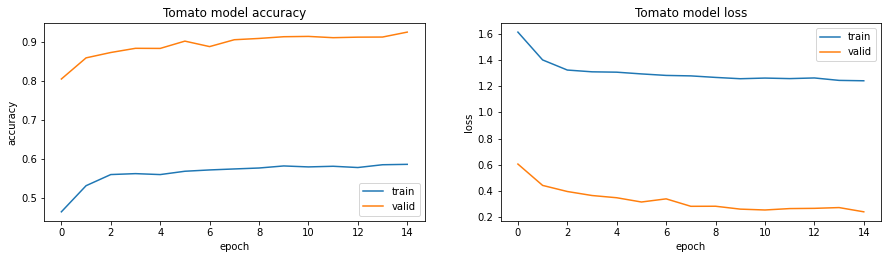

In [32]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('Tomato model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('Tomato model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()